In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data=pd.read_csv('/content/auto-mpg (1).csv')
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [ ]:
data.shape

(398, 9)

In [ ]:
data.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [ ]:
data.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

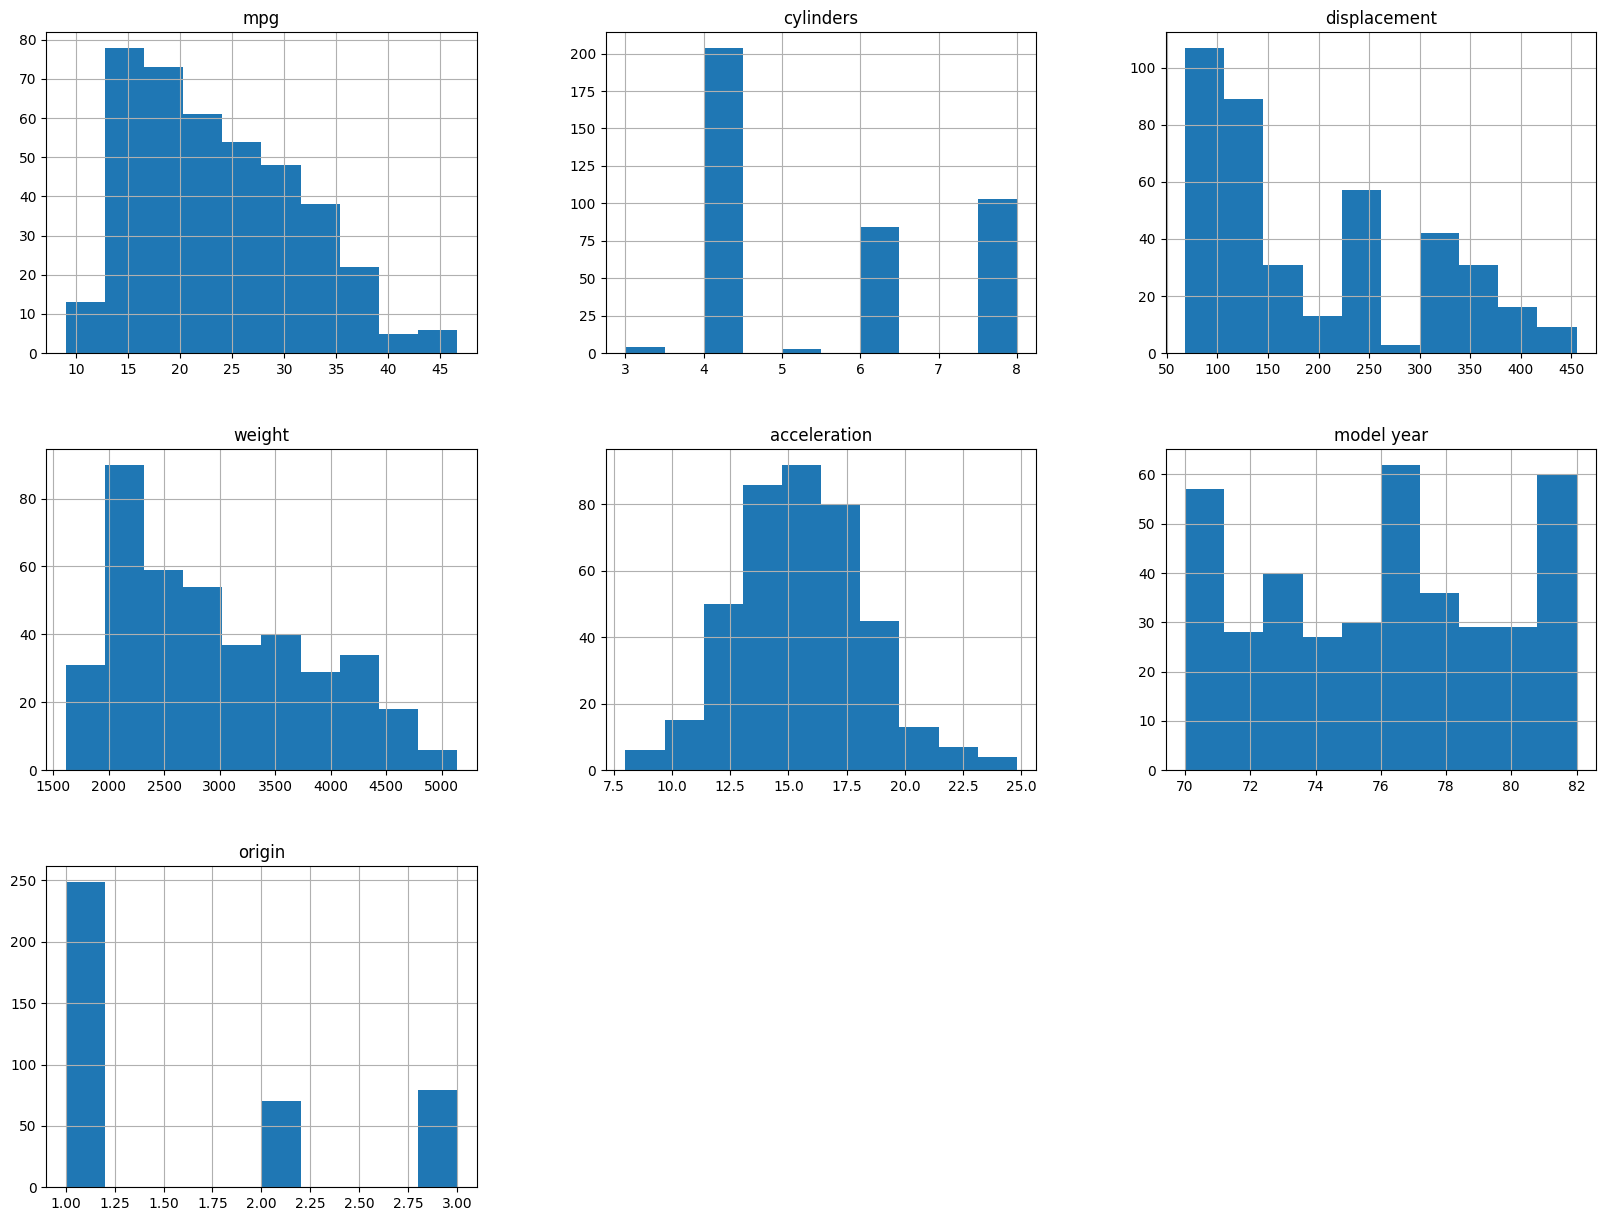

In [ ]:
data.hist(figsize=(20,15))

plt.show()

<ipython-input-9-cb725442b815>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmatrix = data.corr()


<Axes: >

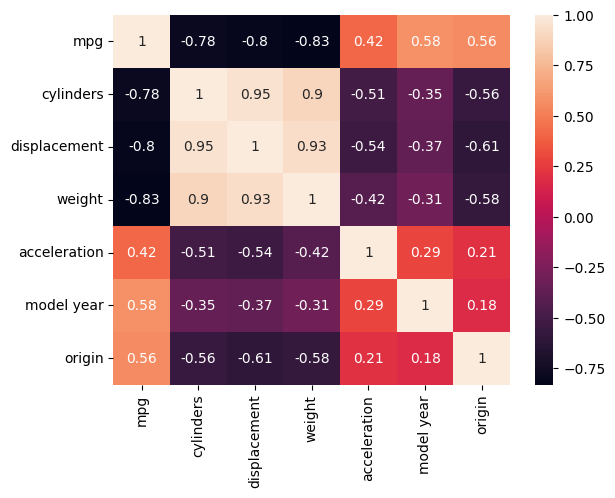

In [ ]:
corrmatrix = data.corr()

sns.heatmap(corrmatrix,annot=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()

In [ ]:
data['horsepower']=le.fit_transform(data['horsepower'])
data['car name']=le.fit_transform(data['car name'])

In [ ]:
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,15,3504,12.0,70,1,49
1,15.0,8,350.0,33,3693,11.5,70,1,36
2,18.0,8,318.0,27,3436,11.0,70,1,231
3,16.0,8,304.0,27,3433,12.0,70,1,14
4,17.0,8,302.0,22,3449,10.5,70,1,161
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,80,2790,15.6,82,1,153
394,44.0,4,97.0,51,2130,24.6,82,2,301
395,32.0,4,135.0,78,2295,11.6,82,1,119
396,28.0,4,120.0,73,2625,18.6,82,1,159


In [ ]:
y = data['acceleration']

x = data.drop(['acceleration'],axis=1)

In [ ]:
x.shape

(398, 8)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.25)

In [ ]:
from sklearn import linear_model
lr=linear_model.LinearRegression()

In [ ]:
model=lr.fit(x_train,y_train)

In [ ]:
predictions=model.predict(x_test)

In [ ]:
predictions

array([15.45225497, 17.84526873, 13.44467063, 13.82002575, 14.63992034,
       15.76585829, 17.6301973 , 11.79468136, 16.30595665, 15.50995533,
       11.24609527, 16.2337384 , 16.83216467, 14.30691141, 16.73294581,
       14.24627947, 18.13082259, 16.40890498, 11.92350823, 15.89131812,
       16.40995282, 15.45437537, 14.20207336, 17.40277241, 13.26623862,
       17.37100854, 16.84091847, 16.86013334, 14.65395008, 13.53613865,
       17.5635662 , 16.33689145, 13.16500905, 15.55224104, 16.51107172,
       12.0696646 , 15.74426488, 13.27359852, 15.45156139, 16.88972581,
       16.0829017 , 15.64334763, 17.1659184 , 14.03783529, 15.86959062,
       15.69347833, 16.14036076, 16.86469744, 16.82466644, 16.8793683 ,
       16.19388408, 16.20271536, 16.25910277, 12.31677422, 16.03435404,
       12.4185553 , 12.72411111, 16.3285438 , 16.15824791, 15.55535967,
       11.8922248 , 15.44270917, 16.8918068 , 17.68582335, 15.71912352,
       15.46190962, 17.14387583, 17.35248891, 17.13018104, 14.60

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,predictions)

3.711998493545272

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,predictions)

0.49045299138048837

In [ ]:
data['horsepower'] =data['horsepower'].astype(float)





